In [ ]:
!pip install pandas_datareader
!pip install yfinance

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [21]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.447412,6.462174,6.398306,6.429939,493729600
2010-01-05,6.458559,6.495012,6.424515,6.465187,601904800
2010-01-06,6.355826,6.484166,6.349198,6.458558,552160000
2010-01-07,6.344078,6.386859,6.297984,6.379327,477131200
2010-01-08,6.386253,6.386856,6.298284,6.335641,447610800


In [25]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.833260,68.893852,67.953453,67.992233,98572000
2019-12-24,68.898689,69.048965,68.571495,69.000488,48478800
2019-12-26,70.265678,70.282646,69.002929,69.032013,93121200
2019-12-27,70.239006,71.249695,69.831825,70.558937,146266000
2019-12-30,70.655869,70.939445,69.128937,70.156586,144114400


In [29]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.447412,6.462174,6.398306,6.429939,493729600
1,2010-01-05,6.458559,6.495012,6.424515,6.465187,601904800
2,2010-01-06,6.355826,6.484166,6.349198,6.458558,552160000
3,2010-01-07,6.344078,6.386859,6.297984,6.379327,477131200
4,2010-01-08,6.386253,6.386856,6.298284,6.335641,447610800


In [31]:
df = df.drop(['Date'], axis = 1)
df.head()

C:\Users\adars\AppData\Local\Temp\ipykernel_21536\3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.447412,6.462174,6.398306,6.429939,493729600
1,6.458559,6.495012,6.424515,6.465187,601904800
2,6.355826,6.484166,6.349198,6.458558,552160000
3,6.344078,6.386859,6.297984,6.379327,477131200
4,6.386253,6.386856,6.298284,6.335641,447610800


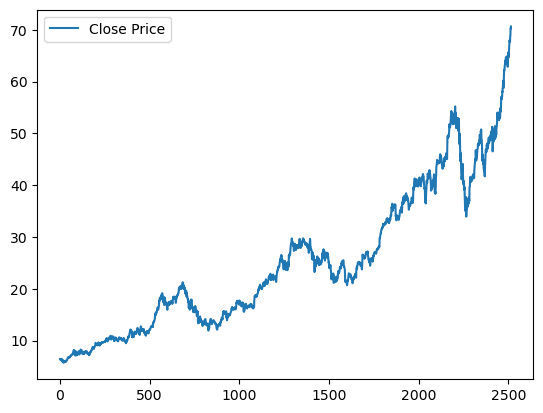

In [33]:
plt.plot(df.Close)
plt.legend(['Close Price'])
plt.show()

In [35]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.447412,6.462174,6.398306,6.429939,493729600
1,6.458559,6.495012,6.424515,6.465187,601904800
2,6.355826,6.484166,6.349198,6.458558,552160000
3,6.344078,6.386859,6.297984,6.379327,477131200
4,6.386253,6.386856,6.298284,6.335641,447610800
...,...,...,...,...,...
2510,68.833260,68.893852,67.953453,67.992233,98572000
2511,68.898689,69.048965,68.571495,69.000488,48478800
2512,70.265678,70.282646,69.002929,69.032013,93121200


In [37]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.275743
2511,57.473592
2512,57.710820
2513,57.938971


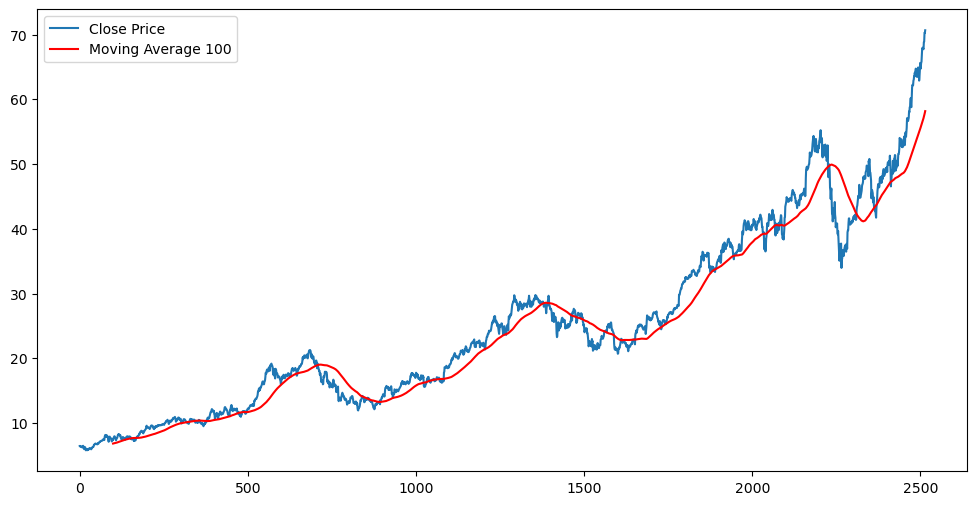

In [39]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.legend(['Close Price', 'Moving Average 100'])
plt.show()

In [41]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.221820
2511,52.349396
2512,52.482847
2513,52.613744


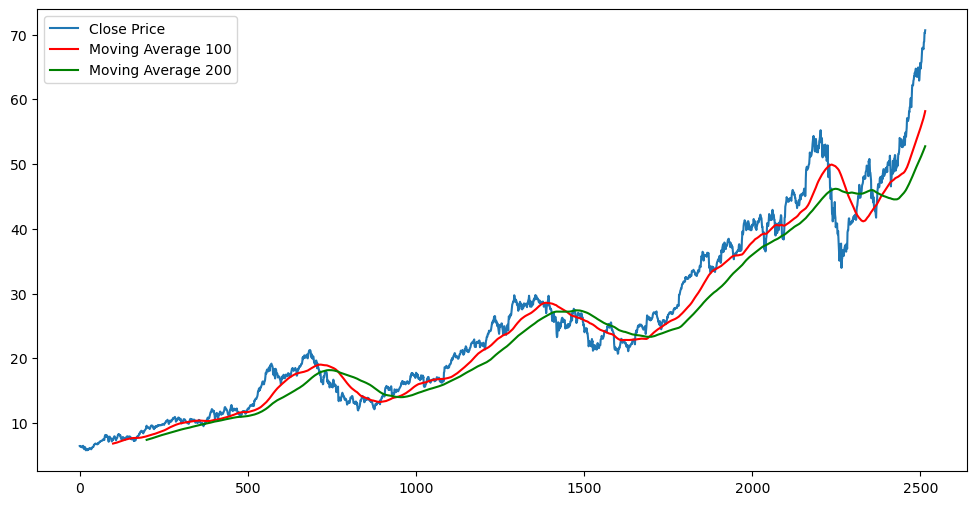

In [43]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.legend(['Close Price', 'Moving Average 100', 'Moving Average 200'])
plt.show()

In [45]:
df.shape

(2515, 5)

In [47]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [29]:
data_training.head()

Ticker,AAPL
0,6.447411
1,6.458560
2,6.355826
3,6.344078
4,6.386255


In [30]:
data_testing.head()

Ticker,AAPL
1760,27.026245
1761,26.815556
1762,26.891966
1763,26.861866
1764,26.998463


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02759996],
       [0.02806506],
       [0.02377921],
       ...,
       [0.88408396],
       [0.89123128],
       [0.88640211]])

In [35]:
data_training_array.shape

(1760, 1)

In [36]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [39]:
x_train.shape

(1660, 100, 1)

In [37]:
# ML Model

In [38]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [40]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 332ms/step - loss: 0.1280
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 350ms/step - loss: 0.0145
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 307ms/step - loss: 0.0100
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - loss: 0.0105
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - loss: 0.0113
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 305ms/step - loss: 0.0090
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - loss: 0.0080
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 307ms/step - loss: 0.0079
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 318ms/step - loss: 0.0077
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - loss: 0.0076
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - loss: 0.0072
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - loss: 0.0071
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - loss: 0.0070
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 320ms/step - loss: 0.0062
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [48]:
data_testing.head()

Ticker,AAPL
1760,27.026245
1761,26.815556
1762,26.891966
1763,26.861866
1764,26.998463


In [50]:
data_training.tail(100)

Ticker,AAPL
1660,24.962515
1661,25.063862
1662,24.877285
1663,24.861160
1664,24.918743
...,...
1755,27.102652
1756,26.924372
1757,26.977627
1758,27.148951


In [51]:
past_100_days = data_training.tail(100)

In [55]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [56]:
final_df.head()

Ticker,AAPL
0,24.962515
1,25.063862
2,24.877285
3,24.861160
4,24.918743


In [57]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573575],
       [0.02789665],
       [0.0239185 ],
       [0.02357469],
       [0.02480246],
       [0.03118719],
       [0.03069608],
       [0.02991033],
       [0.02922275],
       [0.03059799],
       [0.02642333],
       [0.02809304],
       [0.02406576],
       [0.0218066 ],
       [0.01871241],
       [0.01812305],
       [0.01409577],
       [0.01458679],
       [0.0176809 ],
       [0.02259235],
       [0.02244497],
       [0.02568662],
       [0.01173828],
       [0.        ],
       [0.01134546],
       [0.02367278],
       [0.0424344 ],
       [0.06109756],
       [0.05790511],
       [0.05132396],
       [0.05127483],
       [0.05117657],
       [0.05643183],
       [0.04705116],
       [0.04788592],
       [0.04891738],
       [0.05314117],
       [0.044448  ],
       [0.04872087],
       [0.04611783],
       [0.04847532],
       [0.04872087],
       [0.05284653],
       [0.05368145],
       [0.06345509],
       [0.06468294],
       [0.06979061],
       [0.068

In [58]:
input_data.shape

(855, 1)

In [59]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [60]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [61]:
# Making predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


In [62]:
y_predicted.shape

(755, 1)

In [63]:
y_test

array([0.06973819, 0.06524591, 0.06687511, 0.06623333, 0.06914582,
       0.07556336, 0.08089495, 0.08148732, 0.08464675, 0.0821784 ,
       0.08114169, 0.0858809 , 0.08583161, 0.08479486, 0.0858809 ,
       0.08627591, 0.08573275, 0.09516165, 0.09545791, 0.09550729,
       0.09392737, 0.09254539, 0.12907608, 0.12798987, 0.13070504,
       0.13667841, 0.14279973, 0.14531762, 0.15002739, 0.14854028,
       0.15434097, 0.16291844, 0.16534779, 0.1645544 , 0.16638898,
       0.17124756, 0.17328059, 0.17040479, 0.17104938, 0.17238793,
       0.17268546, 0.18656796, 0.18245284, 0.18651843, 0.18433675,
       0.18522925, 0.1826513 , 0.18106451, 0.18334526, 0.18364279,
       0.18260144, 0.18988973, 0.19103006, 0.18755953, 0.19484774,
       0.18681587, 0.19464944, 0.19217064, 0.19078231, 0.19197234,
       0.20644954, 0.208036  , 0.20709388, 0.20575541, 0.20595339,
       0.21125878, 0.20754026, 0.20575541, 0.20416871, 0.2033259 ,
       0.19569055, 0.1965336 , 0.19281483, 0.19668228, 0.19355

In [64]:
y_predicted

array([[0.10509913],
       [0.1056814 ],
       [0.10625605],
       [0.10679957],
       [0.10729581],
       [0.10773069],
       [0.10809889],
       [0.10840894],
       [0.10867986],
       [0.10893041],
       [0.10918237],
       [0.10944791],
       [0.10973205],
       [0.11004268],
       [0.11038262],
       [0.1107492 ],
       [0.11113831],
       [0.11154374],
       [0.11195765],
       [0.11238608],
       [0.11283298],
       [0.11330004],
       [0.11378321],
       [0.11428288],
       [0.1148508 ],
       [0.11552891],
       [0.11635576],
       [0.11736608],
       [0.1185787 ],
       [0.1200102 ],
       [0.12166801],
       [0.12354469],
       [0.12563094],
       [0.12791738],
       [0.13038537],
       [0.13300583],
       [0.13574687],
       [0.13857844],
       [0.1414685 ],
       [0.14437726],
       [0.14727229],
       [0.15012452],
       [0.15292111],
       [0.15565592],
       [0.15832376],
       [0.16091752],
       [0.16342658],
       [0.165

In [66]:
scaler.scale_

array([0.0213218])

In [67]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

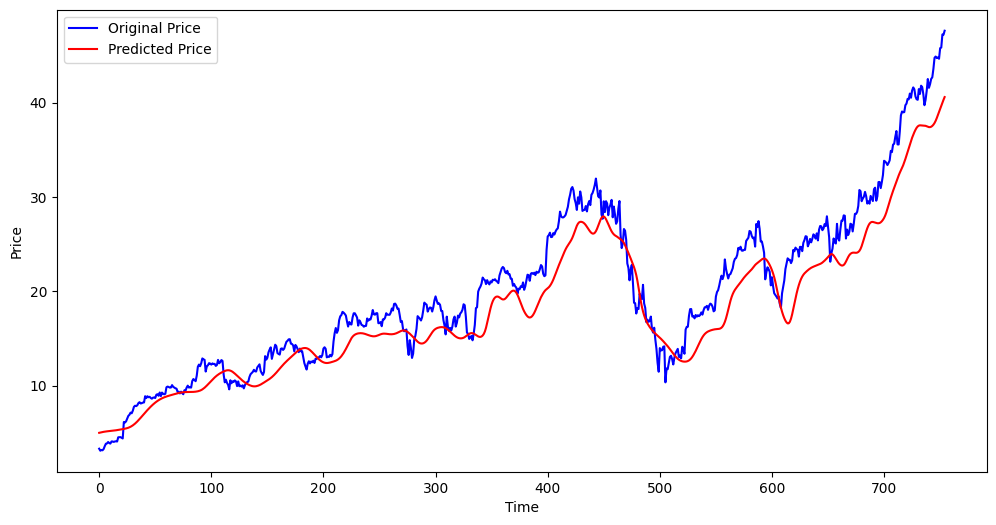

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [47]:
model.save('keras_model.h5')